In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv(r"C:\Users\ASUS-PC\Downloads\train_wn75k28.csv")


In [3]:
test= pd.read_csv(r"C:\Users\ASUS-PC\Downloads\test_Wf7sxXF.csv")

In [4]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train.shape)
print(test.shape)

(39161, 19)
(13184, 18)


In [7]:
print(train.groupby('buy').size())

buy
0    37163
1     1998
dtype: int64


In [8]:
## Dropping date columns
train=train.drop(['created_at','signup_date'],axis=1)
test=test.drop(['created_at','signup_date'],axis=1)

 ### The data is highly imbalance

In [9]:
#null value checks
train.isnull().sum()

id                          0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

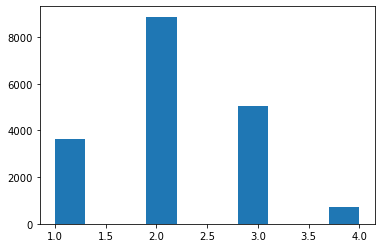

In [10]:
# we see some  null values 
import matplotlib.pyplot as plt
plt.hist(train.products_purchased)
plt.show()

In [11]:
train.products_purchased.value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [12]:
## Filling missing values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
testdf = train[train['products_purchased'].isnull()==True]
traindf = train[train['products_purchased'].isnull()==False]
y = traindf['products_purchased']
traindf1=traindf.drop(["products_purchased","id"],axis=1)
lr.fit(traindf1,y)
testdf1=testdf.drop(["products_purchased","id"],axis=1)
pred = lr.predict(testdf1)
testdf['products_purchased']= pred
traindf['products_purchased']= y


<ipython-input-12-ab6d43749ee1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['products_purchased']= pred
<ipython-input-12-ab6d43749ee1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['products_purchased']= y


In [13]:
testdf.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
4,5,4,6,2.178168,0,0,0,0,0,0,1,0,0,0,1,0,0
7,8,7,3,2.099170,0,0,0,0,0,1,0,0,0,0,1,0,0
11,12,7,4,2.099528,1,0,0,0,0,1,0,1,0,0,0,0,0
14,15,4,7,2.176828,0,0,0,0,0,1,0,0,0,0,1,0,0
15,16,7,2,2.099004,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
traindf.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,3,4,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0


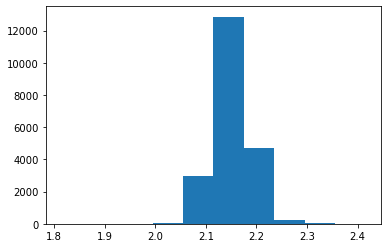

In [15]:
plt.hist(testdf.products_purchased)
plt.show()

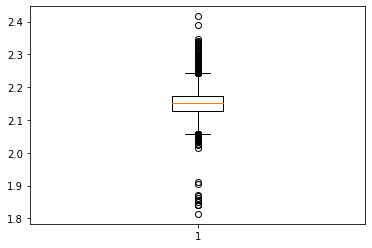

In [16]:
plt.boxplot(testdf.products_purchased)
plt.show()

In [17]:
testdf.products_purchased.describe()

count    20911.000000
mean         2.151686
std          0.036277
min          1.813877
25%          2.128175
50%          2.150859
75%          2.174461
max          2.416107
Name: products_purchased, dtype: float64

In [18]:
conditions = [
    (testdf['products_purchased'] < 2.119210),
    (testdf['products_purchased'] > 2.177225)]
choices = [1, 3]
testdf['products_purchased'] = np.select(conditions, choices, default=2)

<ipython-input-18-dc42b626403c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['products_purchased'] = np.select(conditions, choices, default=2)


In [19]:
testdf.products_purchased.value_counts()

2    12572
3     4681
1     3658
Name: products_purchased, dtype: int64

In [20]:
testdf.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
4,5,4,6,3,0,0,0,0,0,0,1,0,0,0,1,0,0
7,8,7,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0
11,12,7,4,1,1,0,0,0,0,1,0,1,0,0,0,0,0
14,15,4,7,2,0,0,0,0,0,1,0,0,0,0,1,0,0
15,16,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
train1=pd.concat([traindf,testdf],axis=0)

In [22]:
train1.products_purchased.value_counts()

2.0    21439
3.0     9705
1.0     7301
4.0      716
Name: products_purchased, dtype: int64

In [23]:
## Filling missing Values in test data set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
testdf = test[test['products_purchased'].isnull()==True]
traindf = test[test['products_purchased'].isnull()==False]
y = traindf['products_purchased']
traindf1=traindf.drop(["products_purchased","id"],axis=1)
lr.fit(traindf1,y)
testdf1=testdf.drop(["products_purchased","id"],axis=1)
pred = lr.predict(testdf1)
testdf['products_purchased']= pred
traindf['products_purchased']= y

<ipython-input-23-5eddee1b8e80>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['products_purchased']= pred
<ipython-input-23-5eddee1b8e80>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['products_purchased']= y


In [24]:
testdf.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2,2,2.148139,1,1,0,0,0,1,0,0,0,0,1,0
2,39164,8,7,2.099611,0,0,0,0,1,1,0,0,0,0,0,0
5,39167,13,5,2.042975,1,0,0,0,0,1,0,0,0,0,0,0
7,39169,1,8,2.163962,0,0,0,0,0,0,1,0,0,0,1,0
8,39170,6,4,2.072950,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
testdf.products_purchased.describe()

count    8136.000000
mean        2.106940
std         0.045058
min         1.470423
25%         2.080252
50%         2.097751
75%         2.127150
max         2.583477
Name: products_purchased, dtype: float64

In [26]:
conditions = [
    (testdf['products_purchased'] < 2.080252),
    (testdf['products_purchased'] > 2.127150)]
choices = [1, 3]
testdf['products_purchased'] = np.select(conditions, choices, default=2)

<ipython-input-26-ba49beb4d9f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['products_purchased'] = np.select(conditions, choices, default=2)


In [27]:
test1=pd.concat([traindf,testdf],axis=0)

In [28]:
test1.products_purchased.value_counts()

2.0    6551
3.0    3293
1.0    3142
4.0     198
Name: products_purchased, dtype: int64

### Clean DataFrame

In [29]:
train1.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [30]:
test1.isnull().sum()

id                      0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
dtype: int64

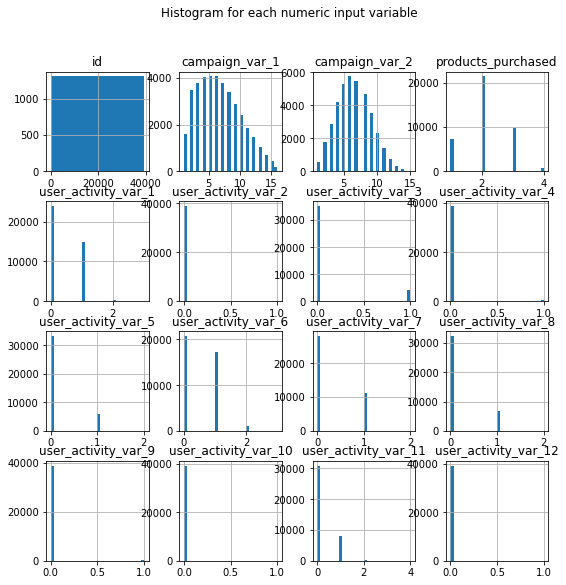

In [31]:
import pylab as pl
train1.drop('buy' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

In [32]:
train1.buy.value_counts()

0    37163
1     1998
Name: buy, dtype: int64

### SMOTE

In [33]:
#!pip install imbalanced-learn

In [34]:
## Data is highly imbalance so lets use over sampling technique to overcome it
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [35]:
train2= train1.set_index("id")
test2= test1.set_index("id")

In [36]:
X = train2.iloc[:,:-1]
y = train2.iloc[:,-1]

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [37]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 26013, 1: 1399})
After oversampling:  Counter({0: 26013, 1: 26013})


### Logistic Regression

In [38]:
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_reg_smote=logreg.fit(X_train_SMOTE, y_train_SMOTE)
log_reg_smote_pred= log_reg_smote.predict(X_test)
print("ROC AUC score for Logistic Regression oversampled SMOTE data: ", roc_auc_score(y_test, log_reg_smote_pred))
print(confusion_matrix(y_test, log_reg_smote_pred))
print(classification_report(y_test, log_reg_smote_pred))

ROC AUC score for Logistic Regression oversampled SMOTE data:  0.8090707232532547
[[9126 2024]
 [ 120  479]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.89     11150
           1       0.19      0.80      0.31       599

    accuracy                           0.82     11749
   macro avg       0.59      0.81      0.60     11749
weighted avg       0.95      0.82      0.87     11749



C:\Users\ASUS-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_smote=dt.fit(X_train_SMOTE, y_train_SMOTE)
dt_smote_pred= dt_smote.predict(X_test)
print("ROC AUC score for Decision Tree oversampled SMOTE data: ", roc_auc_score(y_test, dt_smote_pred))
print(confusion_matrix(y_test, dt_smote_pred))
print(classification_report(y_test, dt_smote_pred))

ROC AUC score for Decision Tree oversampled SMOTE data:  0.7554951076906952
[[9923 1227]
 [ 227  372]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     11150
           1       0.23      0.62      0.34       599

    accuracy                           0.88     11749
   macro avg       0.61      0.76      0.64     11749
weighted avg       0.94      0.88      0.90     11749



### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_smote=knn.fit(X_train_SMOTE, y_train_SMOTE)
knn_smote_pred= knn_smote.predict(X_test)
print("ROC AUC score for KNN oversampled SMOTE data: ", roc_auc_score(y_test, knn_smote_pred))
print(confusion_matrix(y_test, knn_smote_pred))
print(classification_report(y_test, knn_smote_pred))

ROC AUC score for KNN oversampled SMOTE data:  0.6668745367840272
[[10590   560]
 [  369   230]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11150
           1       0.29      0.38      0.33       599

    accuracy                           0.92     11749
   macro avg       0.63      0.67      0.64     11749
weighted avg       0.93      0.92      0.93     11749



### Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_SMOTE = gnb.fit(X_train_SMOTE, y_train_SMOTE)
gnb_SMOTE_pred = gnb_SMOTE.predict(X_test)

print("ROC AUC score for GNB oversampled SMOTE data: ", roc_auc_score(y_test, gnb_SMOTE_pred))
print(confusion_matrix(y_test, gnb_SMOTE_pred))
print(classification_report(y_test, gnb_SMOTE_pred))

ROC AUC score for GNB oversampled SMOTE data:  0.7235991974666297
[[11129    21]
 [  330   269]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11150
           1       0.93      0.45      0.61       599

    accuracy                           0.97     11749
   macro avg       0.95      0.72      0.79     11749
weighted avg       0.97      0.97      0.97     11749



### Model Fitting on entire training set

In [43]:
# summarize class distribution
print("Before oversampling: ",Counter(y))


# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X, y)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 37163, 1: 1998})
After oversampling:  Counter({0: 37163, 1: 37163})


In [45]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,    
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_SMOTE, y_train_SMOTE)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.006579332246575682}

In [46]:
prediction=gs_NB.predict(test2)

In [47]:
test2['buy']=prediction

In [48]:
test2.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,
39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0
39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,1
39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0
39168,2,4,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
39173,3,6,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
test3= test2.reset_index()

In [50]:
test3.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,1
2,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,39168,2,4,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,39173,3,6,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
test4= test3[['id','buy']]

In [53]:
test4.to_csv('sample_submission.csv',index=False)